## Introduction to Scanpy

Run this notebook step by step to apply a preprocessing and clustering pipeline of around 3,000 Peripheral Blood Mononuclear Cells (PBMC), freely available from 10X Genomics. There are 2,700 single cells that were sequenced on the Illumina NextSeq 500. This was adapted from the following Scanpy tutorial:

https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [1]:
# Uncomment only if you have not downloaded the data already
# !mkdir data
# !curl -o data/pbmc3k_filtered_gene_bc_matrices.tar.gz https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
# !tar -xzf data/pbmc3k_filtered_gene_bc_matrices.tar.gz -C data
# !mkdir write

In [2]:
import scanpy as sc
import pandas as pd

In [3]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor="white")

In [4]:
# File paths from the downloaded data
matrix_file = "data/filtered_gene_bc_matrices/hg19/matrix.mtx"
genes_file = "data/filtered_gene_bc_matrices/hg19/genes.tsv"
barcodes_file = "data/filtered_gene_bc_matrices/hg19/barcodes.tsv"

In [5]:
# Read the matrix data, and transpose to make cells (rows) x genes (columns):
adata = sc.read_mtx(matrix_file).T

In [6]:
adata.var_names = pd.read_csv(genes_file, header=None, sep='\t')[1]
print(adata.var_names)

adata.obs_names = pd.read_csv(barcodes_file, header=None)[0]
print(adata.obs_names)

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2', 'AL590523.1', 'CT476828.1', 'PNRC2', 'SRSF10', 'AC145205.1',
       'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', length=32738)
Index(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1',
       'AAACCGTGCTTCCG-1', 'AAACCGTGTATGCG-1', 'AAACGCACTGGTAC-1',
       'AAACGCTGACCAGT-1', 'AAACGCTGGTTCTT-1', 'AAACGCTGTAGCCA-1',
       'AAACGCTGTTTCTG-1',
       ...
       'TTTCAGTGTCACGA-1', 'TTTCAGTGTCTATC-1', 'TTTCAGTGTGCAGT-1',
       'TTTCCAGAGGTGAG-1', 'TTTCGAACACCTGA-1', 'TTTCGAACTCTCAT-1',
       'TTTCTACTGAGGCA-1', 'TTTCTACTTCCTCG-1', 'TTTGCATGAGAGGC-1',
       'TTTGCATGCCTCAC-1'],
      dtype='object', length=2700)


In [7]:
adata.var

""
MIR1302-10
FAM138A
OR4F5
RP11-34P13.7
RP11-34P13.8
...
AC145205.1
BAGE5
CU459201.1
AC002321.2


In [8]:
print('Number of unique gene names before calling var_names_make_unique =', len(pd.unique(adata.var_names)))
adata.var_names_make_unique()
print('Number of unique gene names after calling var_names_make_unique =', len(pd.unique(adata.var_names)))

Number of unique gene names before calling var_names_make_unique = 32643
Number of unique gene names after calling var_names_make_unique = 32738


normalizing counts per cell
    finished (0:00:00)


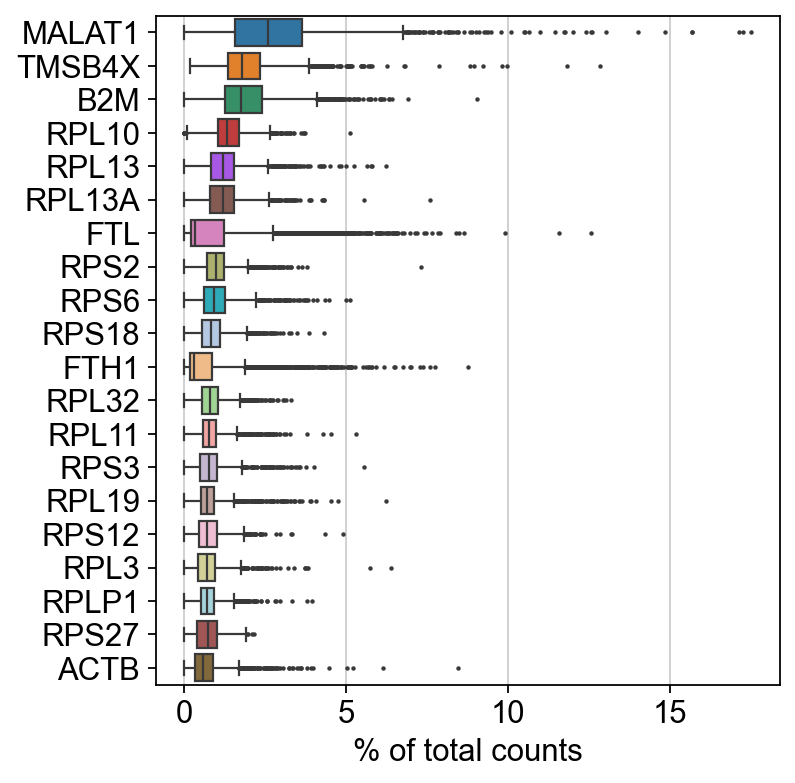

In [9]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [10]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata

filtered out 19024 genes that are detected in less than 3 cells


AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes'
    var: 'n_cells'

In [11]:
# annotate the group of mitochondrial genes as "mt"
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)
adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [12]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


In [13]:
adata.var

,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,9,False,9,0.003333,99.666667,9.0
AP006222.2,3,False,3,0.001111,99.888889,3.0
RP11-206L10.2,5,False,5,0.001852,99.814815,5.0
RP11-206L10.9,3,False,3,0.001111,99.888889,3.0
LINC00115,18,False,18,0.006667,99.333333,18.0
...,...,...,...,...,...,...
AC145212.1,16,False,16,0.006667,99.407407,18.0
AL592183.1,323,False,323,0.134815,88.037037,364.0
AL354822.1,8,False,8,0.002963,99.703704,8.0
PNRC2-1,110,False,110,0.042963,95.925926,116.0


In [14]:
adata.obs['n_genes']

AAACATACAACCAC-1     781
AAACATTGAGCTAC-1    1352
AAACATTGATCAGC-1    1131
AAACCGTGCTTCCG-1     960
AAACCGTGTATGCG-1     522
                    ... 
TTTCGAACTCTCAT-1    1155
TTTCTACTGAGGCA-1    1227
TTTCTACTTCCTCG-1     622
TTTGCATGAGAGGC-1     454
TTTGCATGCCTCAC-1     724
Name: n_genes, Length: 2700, dtype: int64

In [15]:
adata.var['n_cells']

AL627309.1         9
AP006222.2         3
RP11-206L10.2      5
RP11-206L10.9      3
LINC00115         18
                ... 
AC145212.1        16
AL592183.1       323
AL354822.1         8
PNRC2-1          110
SRSF10-1          69
Name: n_cells, Length: 13714, dtype: int64

In [16]:
adata.var['mt']

AL627309.1       False
AP006222.2       False
RP11-206L10.2    False
RP11-206L10.9    False
LINC00115        False
                 ...  
AC145212.1       False
AL592183.1       False
AL354822.1       False
PNRC2-1          False
SRSF10-1         False
Name: mt, Length: 13714, dtype: bool

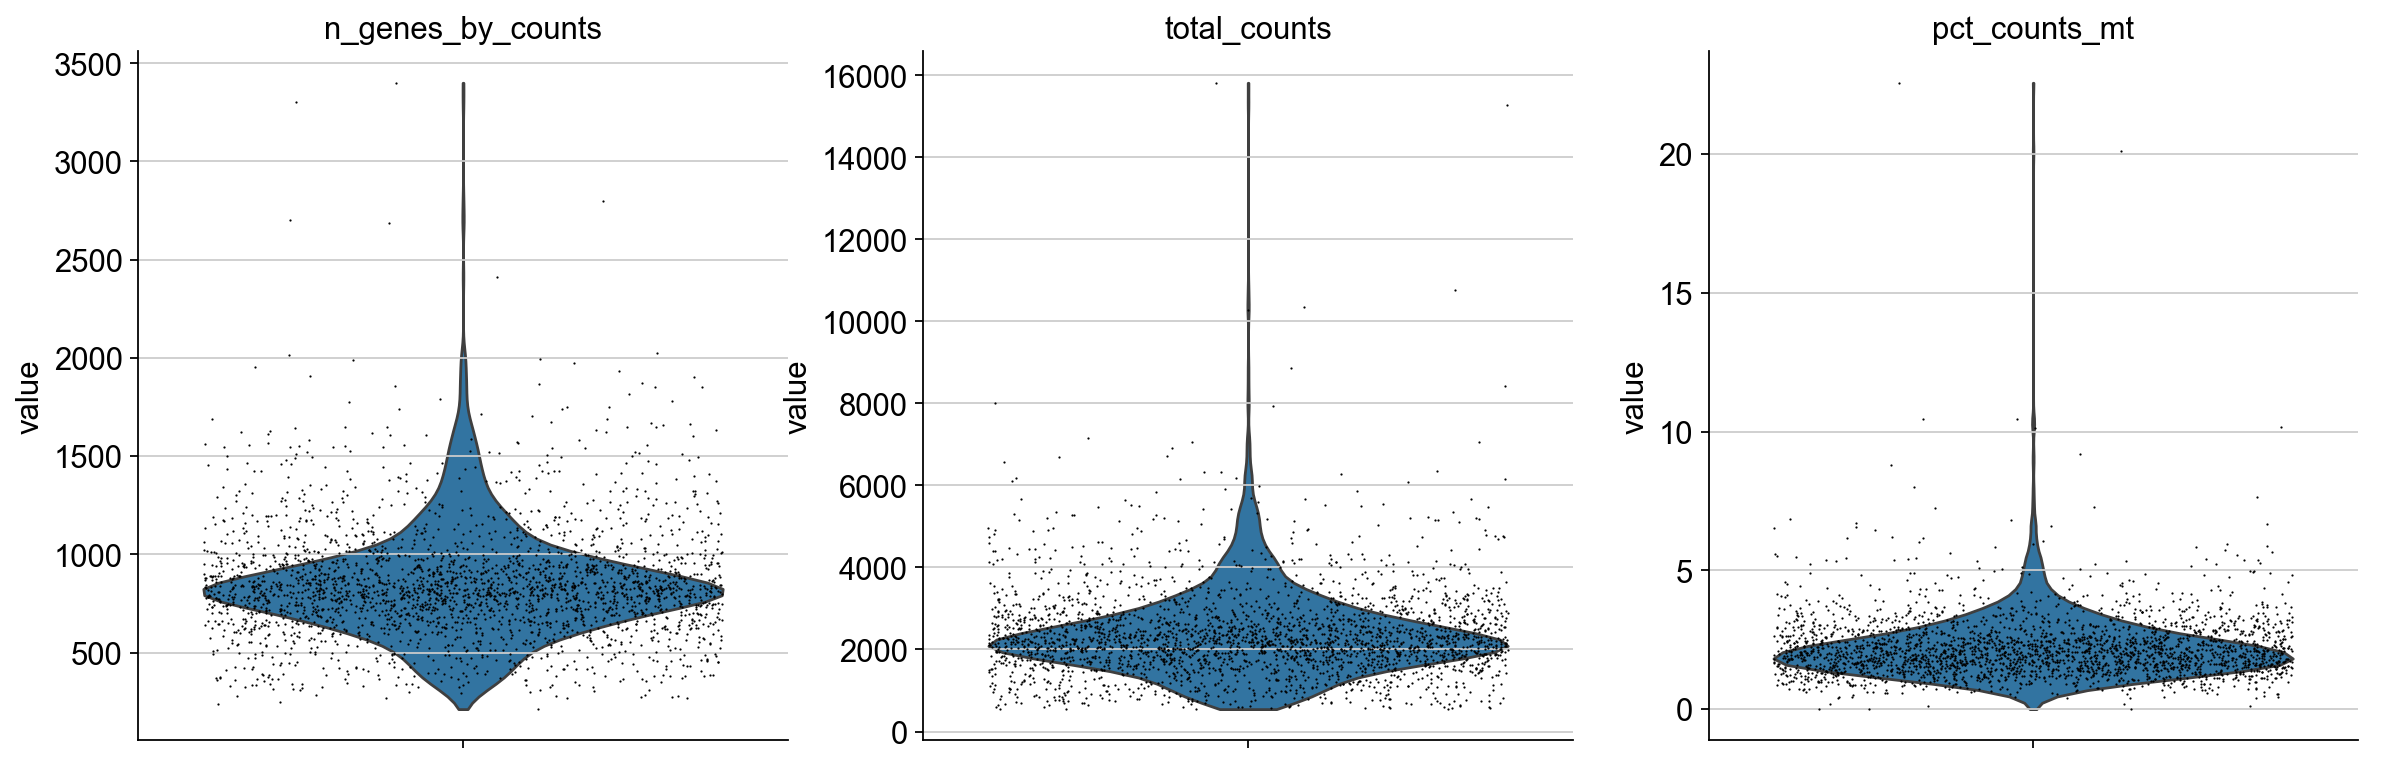

In [17]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True
)

In [18]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :].copy()
adata

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [19]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [20]:
sc.pp.log1p(adata)

In [21]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/Users/andres/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


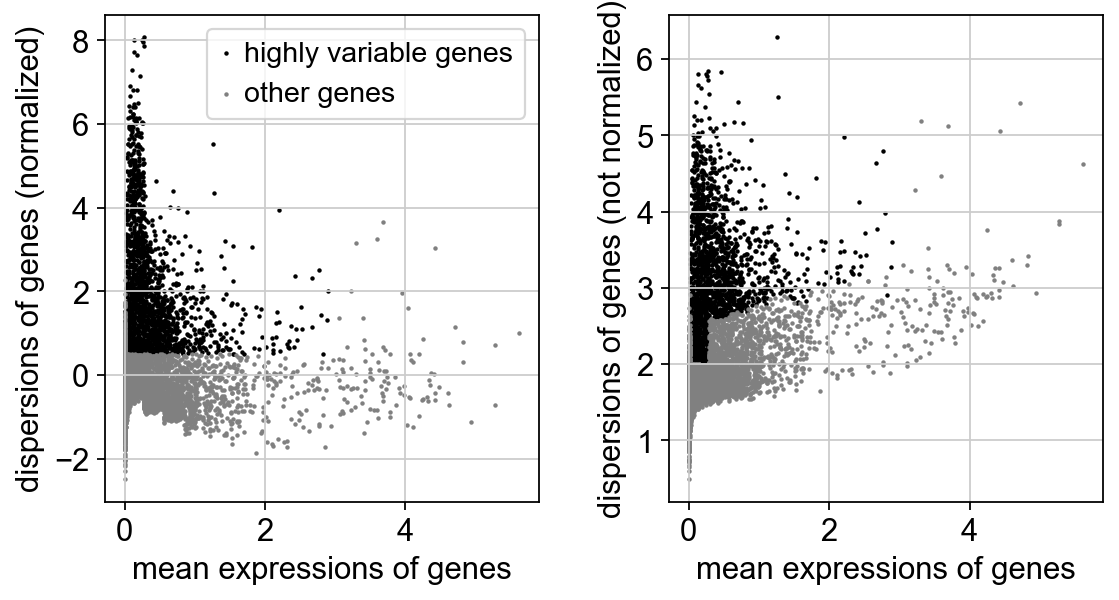

In [22]:
sc.pl.highly_variable_genes(adata)

In [23]:
adata.raw = adata

In [24]:
adata = adata[:, adata.var.highly_variable]

In [25]:
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:03)


In [26]:
sc.pp.scale(adata, max_value=10)

In [27]:
sc.tl.pca(adata, svd_solver="arpack")

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


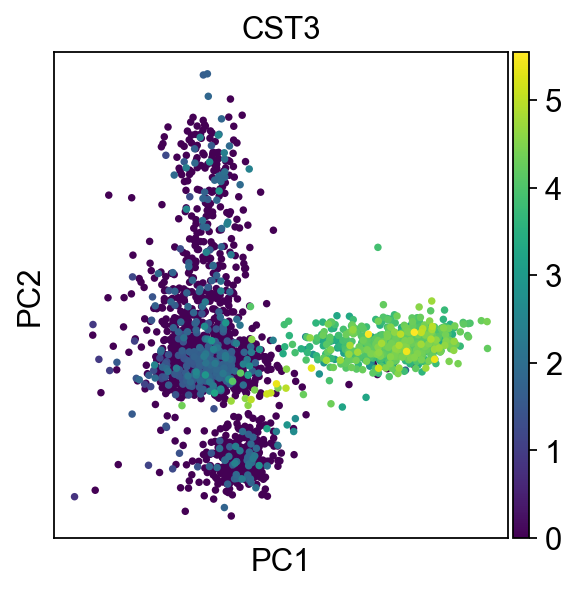

In [28]:
sc.pl.pca(adata, color="CST3")

In [29]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [30]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


In [31]:
sc.tl.leiden(
    adata,
    resolution=0.9,
    random_state=0,
    n_iterations=2,
    directed=False,
)
adata

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [32]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

# sc.tl.umap(adata)

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


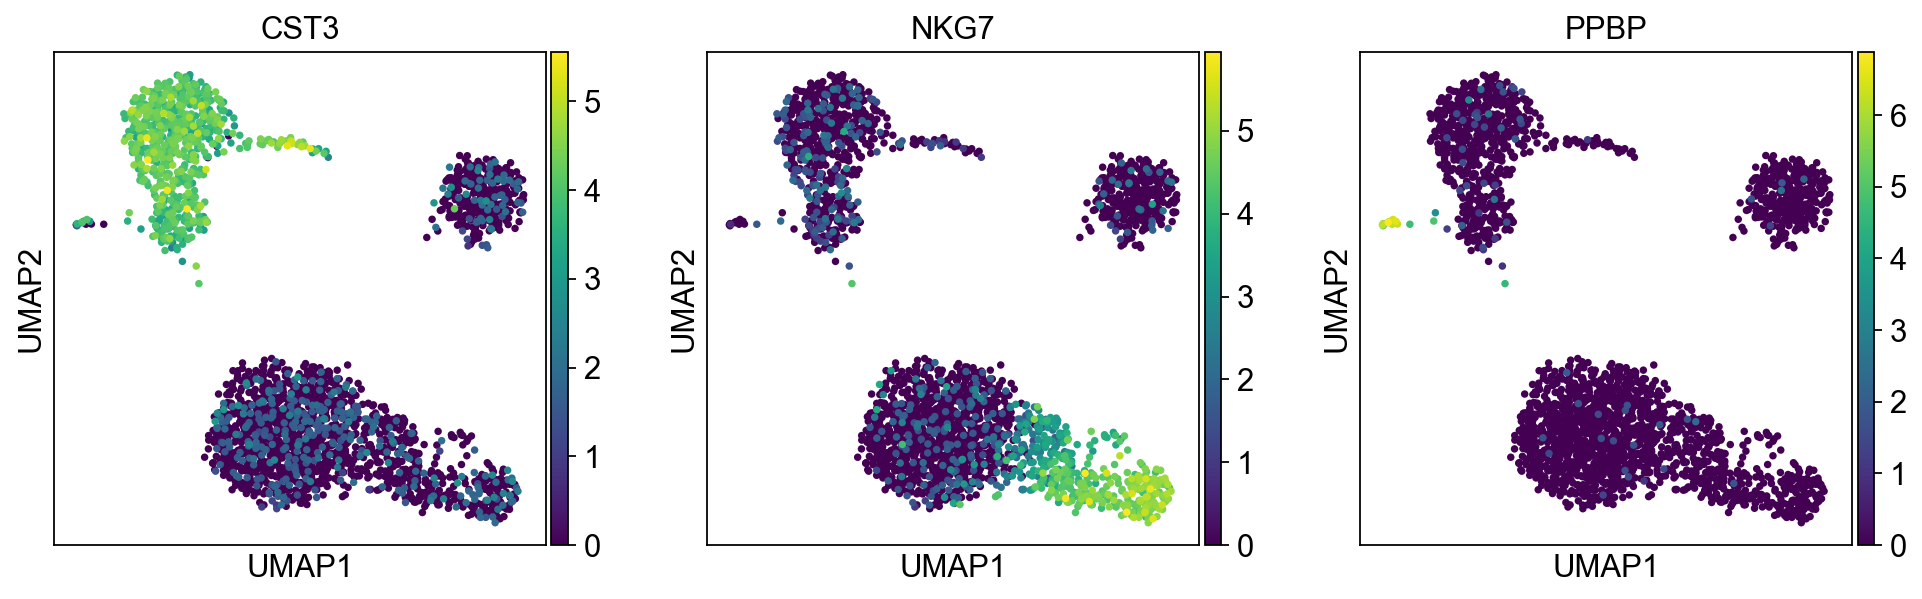

In [33]:
sc.pl.umap(adata, color=["CST3", "NKG7", "PPBP"])

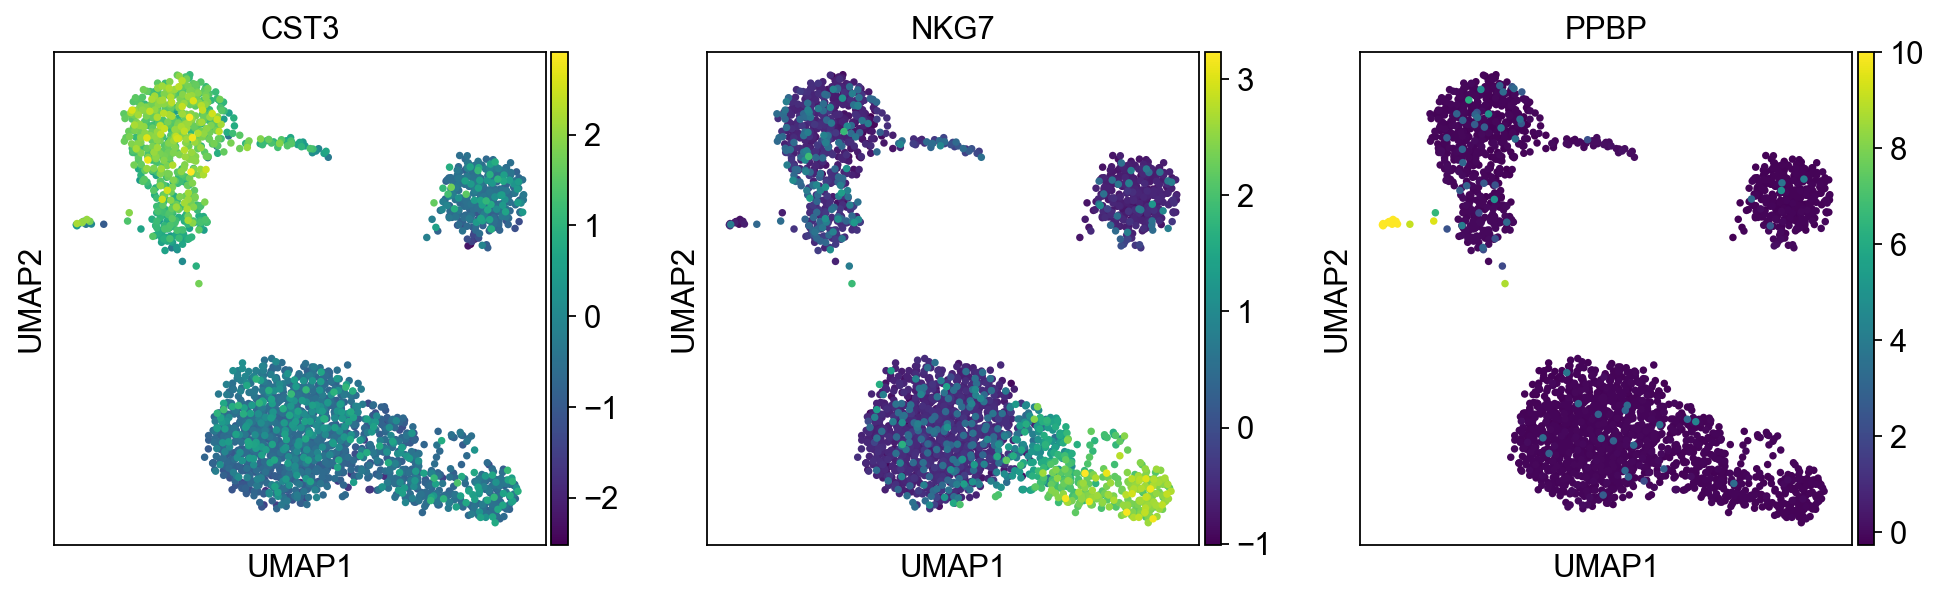

In [34]:
sc.pl.umap(adata, color=["CST3", "NKG7", "PPBP"], use_raw=False)

/Users/andres/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/andres/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


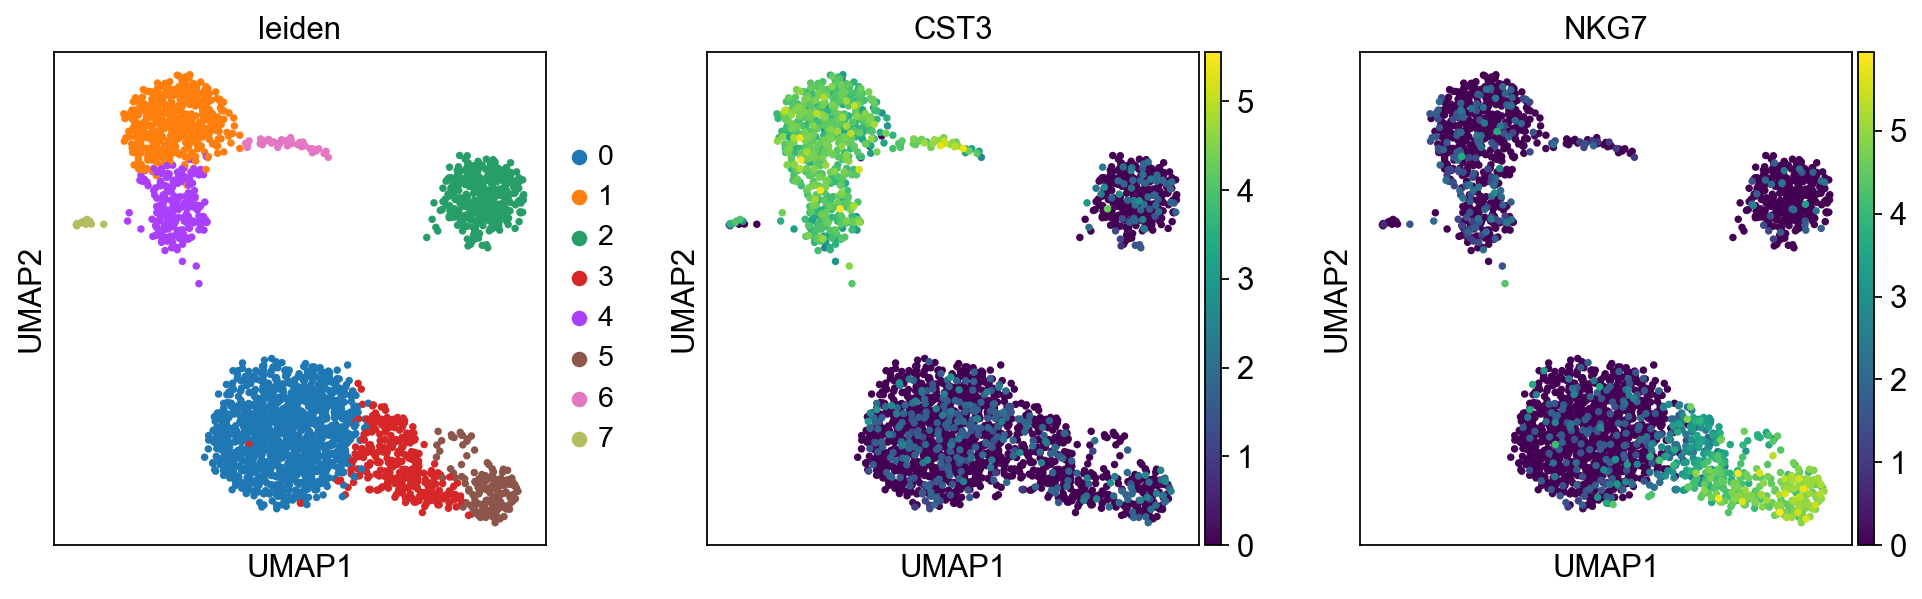

In [35]:
sc.pl.umap(adata, color=["leiden", "CST3", "NKG7"])

In [36]:
sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")

ranking genes


/Users/andres/miniconda3/envs/scanpy/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


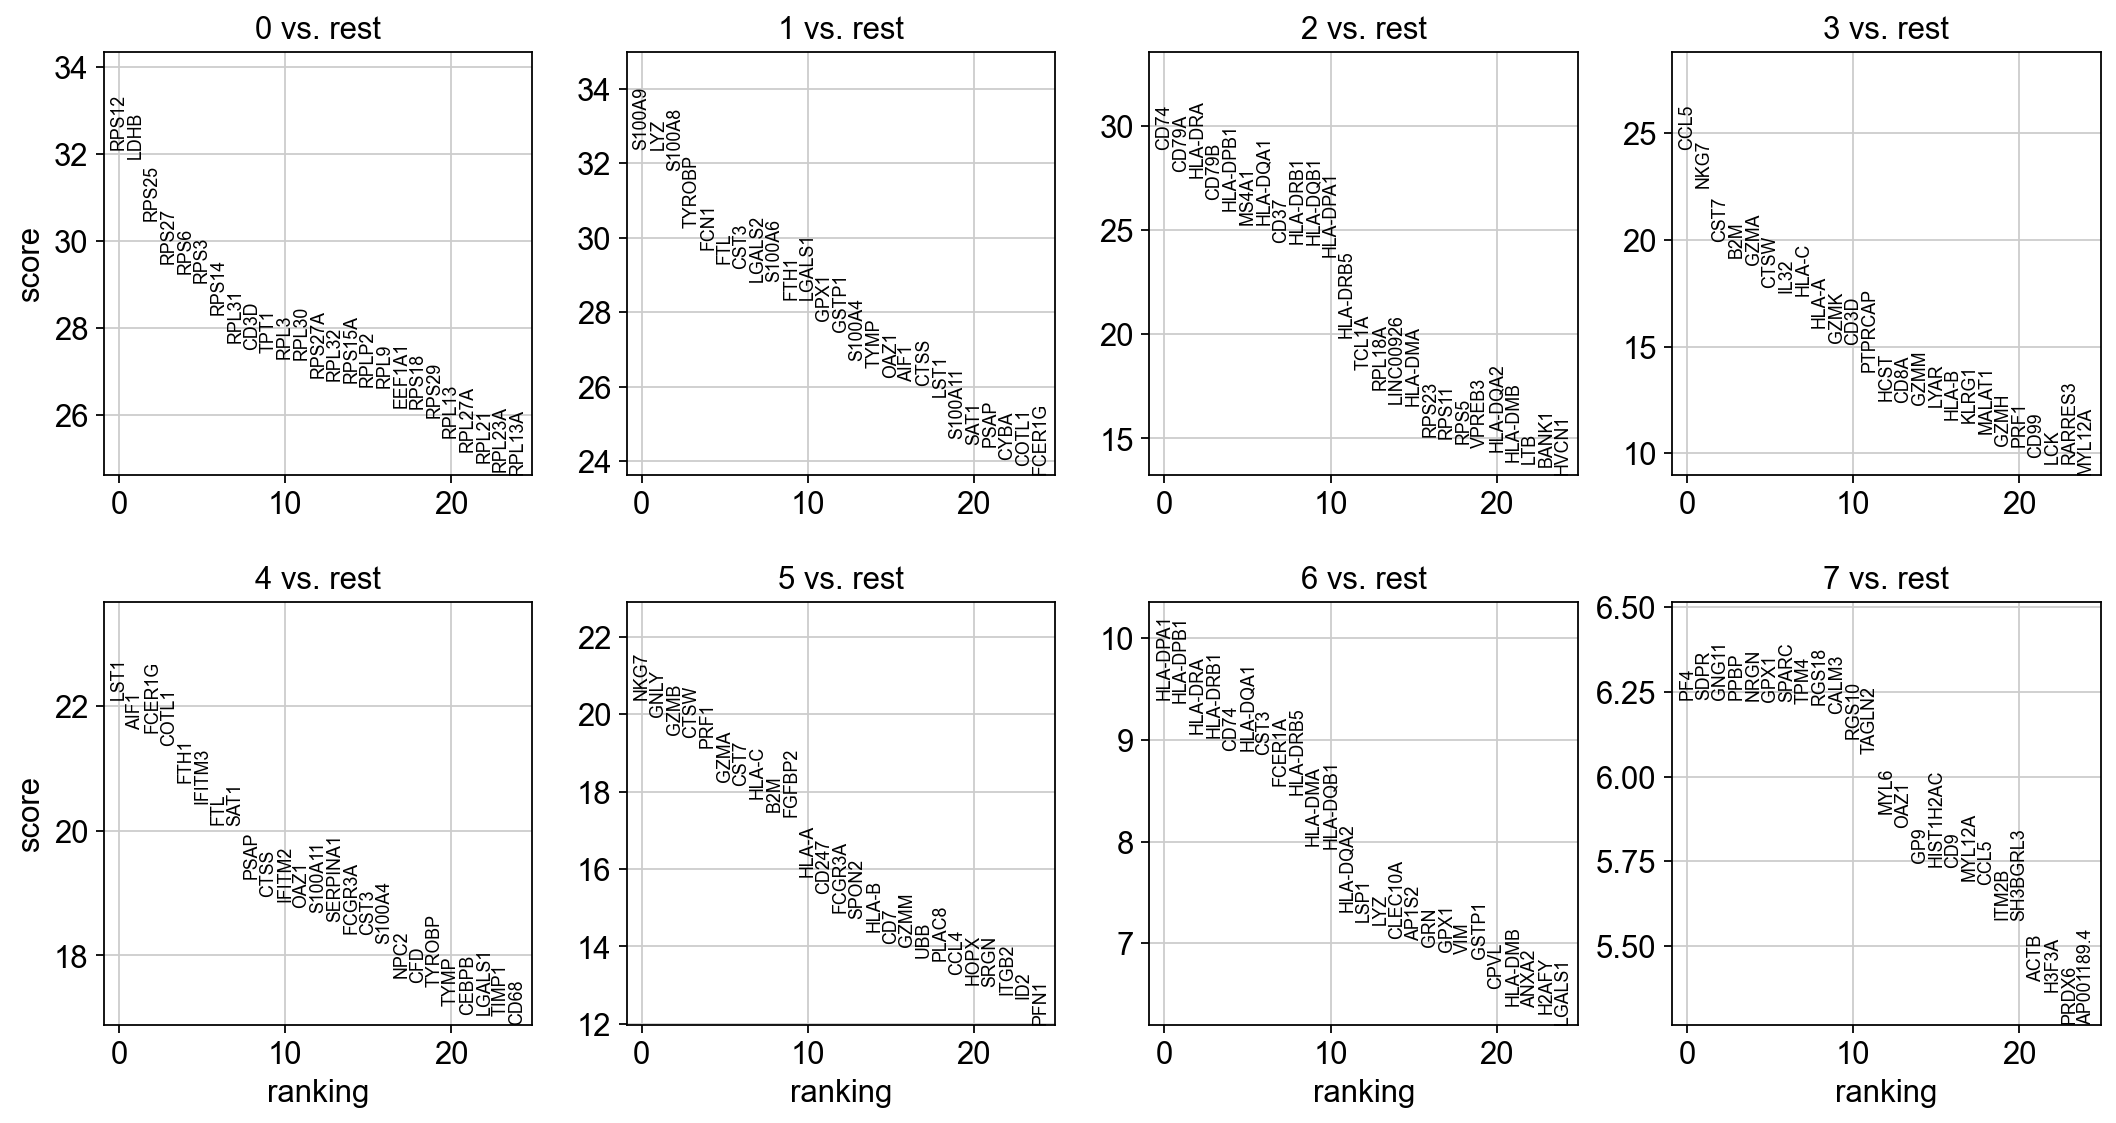

In [37]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [38]:
pd.DataFrame(adata.uns["rank_genes_groups"]["names"]).head(5)

,0,1,2,3,4,5,6,7
0,RPS12,S100A9,CD74,CCL5,LST1,NKG7,HLA-DPA1,PF4
1,LDHB,LYZ,CD79A,NKG7,AIF1,GNLY,HLA-DPB1,SDPR
2,RPS25,S100A8,HLA-DRA,CST7,FCER1G,GZMB,HLA-DRA,GNG11
3,RPS27,TYROBP,CD79B,B2M,COTL1,CTSW,HLA-DRB1,PPBP
4,RPS6,FCN1,HLA-DPB1,GZMA,FTH1,PRF1,CD74,NRGN


In [39]:
marker_genes = ["IL7R", "CD79A", "MS4A1", "CD8A", "CD8B", "LYZ", 
                "CD14", "LGALS3", "S100A8", "GNLY", "NKG7", "KLRB1", 
                "FCGR3A", "MS4A7", "FCER1A", "CST3", "PPBP"]

In [40]:
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names
pd.DataFrame(
    {
        group + "_" + key[:1]: result[key][group]
        for group in groups
        for key in ["names", "pvals"]
    }
).head(5)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p,7_n,7_p
0,RPS12,3.490550e-226,S100A9,7.006710e-230,CD74,2.487145e-183,CCL5,7.520377e-130,LST1,2.841447e-108,NKG7,1.923512e-92,HLA-DPA1,5.422417e-21,PF4,4.722886e-10
1,LDHB,3.275591e-223,LYZ,7.591243e-230,CD79A,1.679730e-170,NKG7,7.441299e-112,AIF1,1.246622e-103,GNLY,1.513503e-88,HLA-DPB1,7.591860e-21,SDPR,4.733899e-10
2,RPS25,4.416350e-204,S100A8,4.376632e-222,HLA-DRA,6.949695e-167,CST7,1.999434e-88,FCER1G,2.757131e-103,GZMB,1.405777e-84,HLA-DRA,1.306768e-19,GNG11,4.733899e-10
3,RPS27,4.966795e-191,TYROBP,3.208884e-201,CD79B,2.569135e-154,B2M,8.502583e-82,COTL1,2.607744e-101,CTSW,7.510027e-84,HLA-DRB1,1.865104e-19,PPBP,4.744938e-10
4,RPS6,4.346170e-188,FCN1,1.108884e-193,HLA-DPB1,3.580735e-148,GZMA,3.422939e-79,FTH1,6.692392e-96,PRF1,1.053180e-81,CD74,5.853161e-19,NRGN,4.800511e-10


In [41]:
new_cluster_names = [
    "CD4 T",
    "CD14+ Monocytes",
    "B",
    "CD8 T",
    "FCGR3A+ Monocytes",
    "NK",
    "Dendritic",
    "Megakaryocytes",
]
adata.rename_categories("leiden", new_cluster_names)

In [42]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/Users/andres/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/andres/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


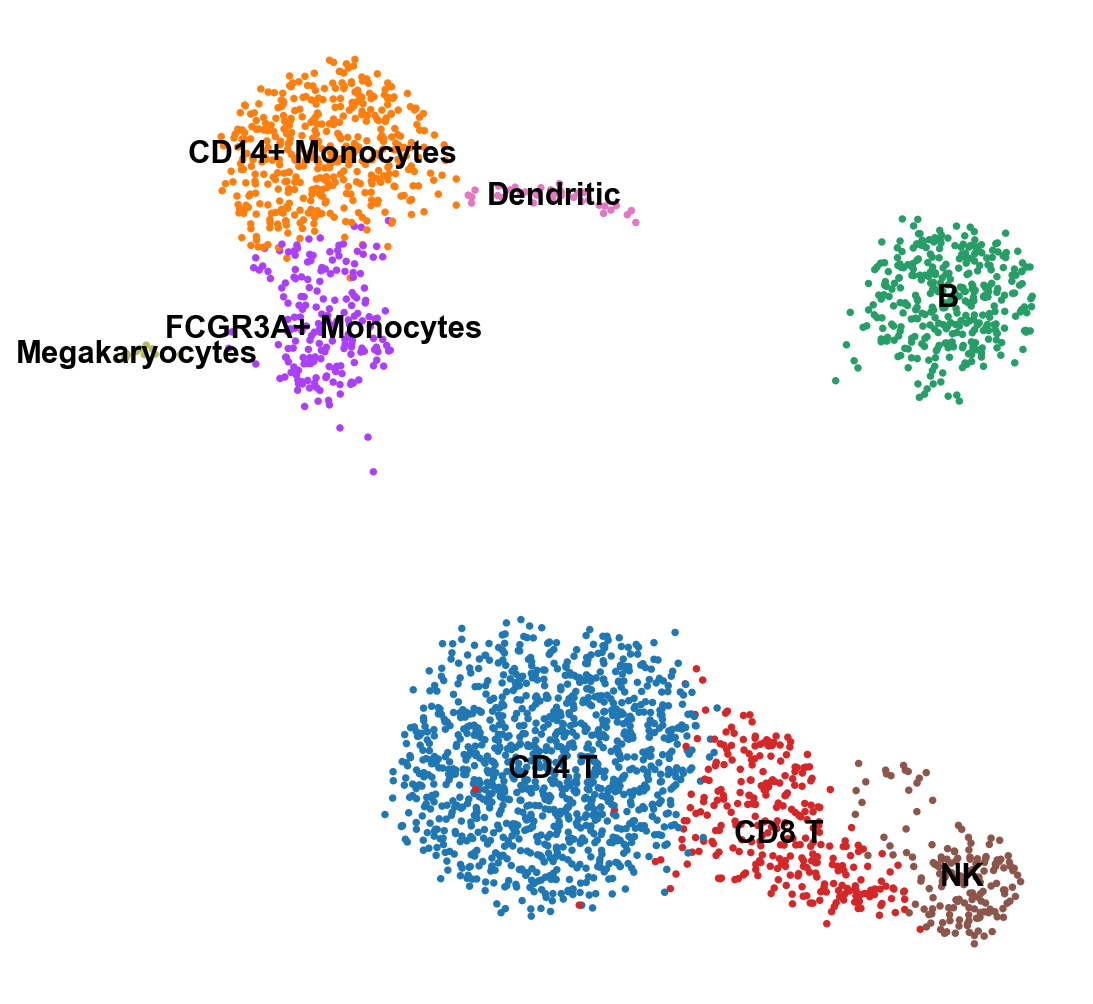

In [43]:
sc.set_figure_params(figsize=(8, 8))
sc.pl.umap(adata, color="leiden", legend_loc="on data", title="", frameon=False)

/Users/andres/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/Users/andres/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/Users/andres/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax

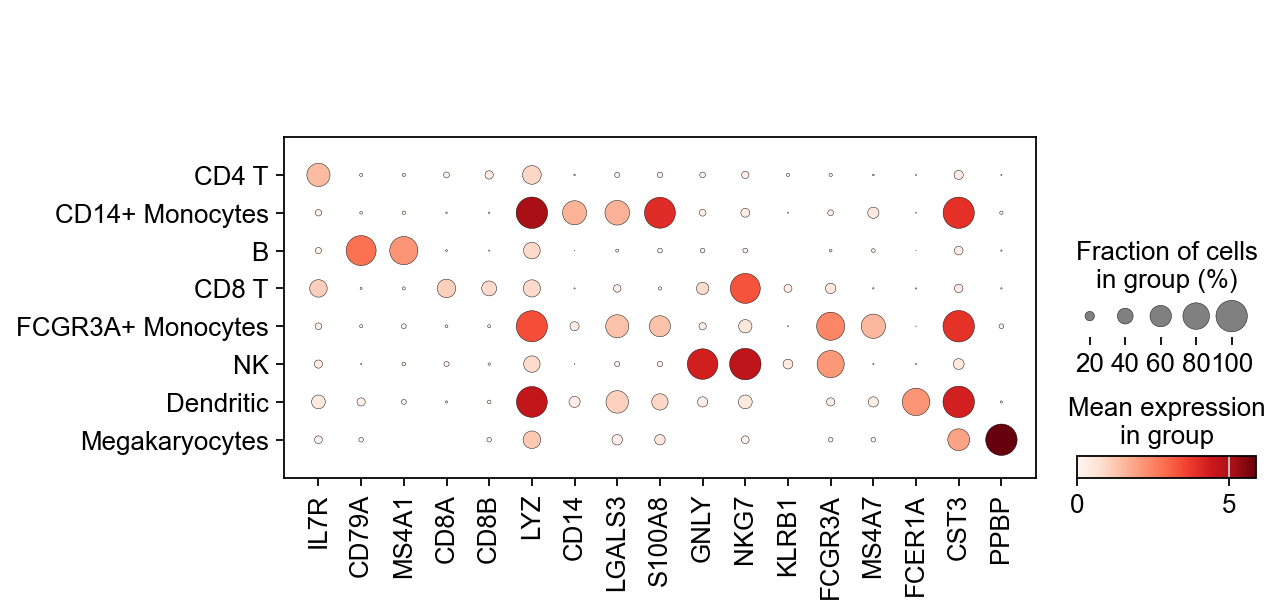

In [44]:
sc.pl.dotplot(adata, marker_genes, groupby="leiden")

In [45]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [46]:
adata.write("data/pbmc3k.h5ad", compression="gzip")

In [47]:
adata.raw.to_adata().write("data/pbmc3k_raw.h5ad", compression="gzip")